In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [6]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [7]:
meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [8]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]

In [9]:
meta_div$log10shann <- log10(meta_div$observed_Shannon)

In [10]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [11]:
pbmc_noLFS <- pbmc[ which(pbmc$cancergroup != "LFS"),]

In [12]:
dim(pbmc_noLFS)

[1] 234  59

In [13]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p_pbmc <- ggplot(
  pbmc_noLFS,
  aes(x = cycle, y = log10shann)
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid")]) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  scale_y_continuous(breaks = log10(c(1,10,100,500,1000, 1500) ) , labels = c(1,10,100,500,1000, 1500)) 
  #geom_pwc(
  #  mapping = aes(x = cycle, y = log10shann), data = pbmc_noLFS,
  #  p.adjust.method = "BH", label = "{p.adj}",
  #  p.adjust.by = "group", method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
  #labs(title = "Observed Shannon Diversity by Cycle - PBMC (n = 234)\nBH corrected p", y = "Observed Shannon Diversity")

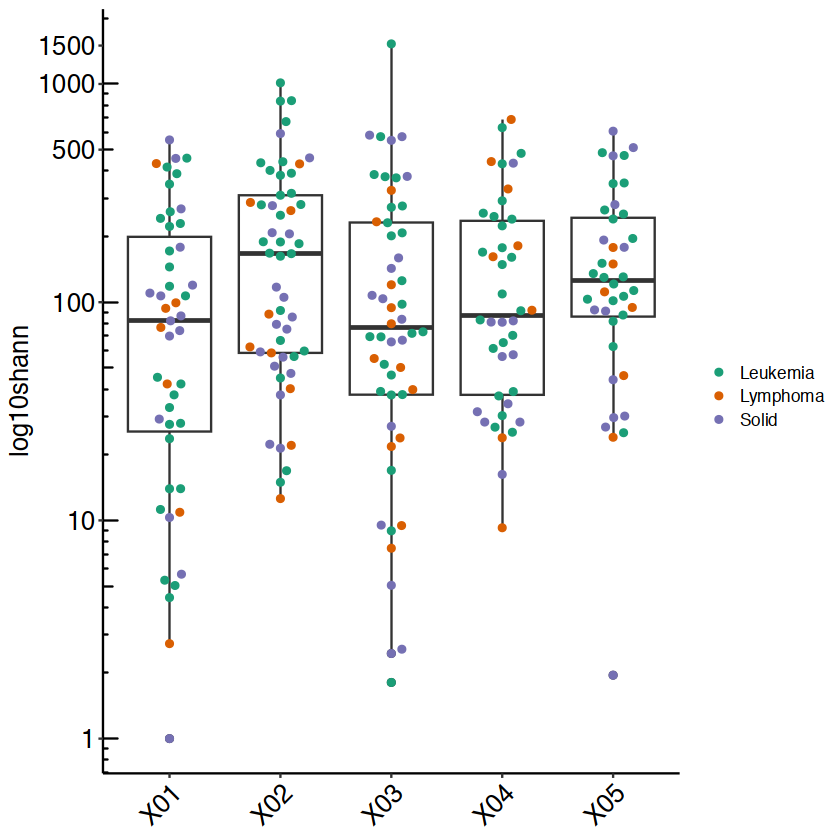

In [14]:
p_pbmc #+ facet_wrap(~cancergroup, nrow = 1)

In [15]:
pacman::p_load(rms)

In [16]:
colnames(pbmc_noLFS)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Naïve"              "SCM"                "TE"                
[16] "EM."                "CM."                "Naïve."            
[19] "SCM."               "TE."                "Naïve.TE"          
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"         "log10shann"

In [17]:
dd <- datadist(pbmc_noLFS[ , c("cycle", "Disease_type", "Age", "log10shann", "cancergroup")])
options(datadist="dd")

In [39]:
options(prType="plain")

In [81]:
f <- ols(log10shann ~ cycle + Disease_type + Age, data = pbmc_noLFS)

In [100]:
anova(f)

,d.f.,Partial SS,MS,F,P
cycle,4,4.2623687,1.0655922,3.487348,0.008803866
Disease_type,18,7.4701581,0.4150088,1.358193,0.155282654
Age,1,0.7563249,0.7563249,2.475214,0.117159090
TOTAL,23,13.7155766,0.5963294,1.951599,0.007594405
ERROR,210,64.1674785,0.3055594,NA,NA


In [107]:
summary(f)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
Age,2,14,12,-0.137711604,0.08753146,-0.31026455,0.03484134,1
cycle - X01:X02,2,1,NA,-0.369809150,0.11220987,-0.59101126,-0.14860704,1
cycle - X03:X02,2,3,NA,-0.281593280,0.10954546,-0.49754296,-0.06564360,1
cycle - X04:X02,2,4,NA,-0.131264933,0.11737489,-0.36264896,0.10011909,1
cycle - X05:X02,2,5,NA,-0.089975217,0.11993625,-0.32640852,0.14645809,1
Disease_type - ALCL:ALL,2,1,NA,0.199502301,0.30119640,-0.39425363,0.79325824,1
Disease_type - AML:ALL,2,3,NA,0.218790428,0.13649633,-0.05028817,0.48786902,1
Disease_type - ARMS:ALL,2,4,NA,0.337451954,0.40248972,-0.45598601,1.13088992,1
Disease_type - BL:ALL,2,5,NA,-0.003115531,0.19939973,-0.39619716,0.38996610,1
Disease_type - BLL:ALL,2,6,NA,-0.024550738,0.29253805,-0.60123826,0.55213678,1


In [106]:
(summary(lm(log10shann ~ cycle + Disease_type + Age, data = pbmc_noLFS)))


Call:
lm(formula = log10shann ~ cycle + Disease_type + Age, data = pbmc_noLFS)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.62265 -0.31336  0.04259  0.36726  1.40792 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.083181   0.314475   6.624 2.88e-10 ***
cycleX02            0.369809   0.112210   3.296  0.00115 ** 
cycleX03            0.088216   0.114010   0.774  0.43995    
cycleX04            0.238544   0.120564   1.979  0.04917 *  
cycleX05            0.279834   0.122842   2.278  0.02373 *  
Disease_typeALL    -0.199502   0.301196  -0.662  0.50846    
Disease_typeAML     0.019288   0.307893   0.063  0.95011    
Disease_typeARMS    0.137950   0.494794   0.279  0.78067    
Disease_typeBL     -0.202618   0.330157  -0.614  0.54008    
Disease_typeBLL    -0.224053   0.394884  -0.567  0.57106    
Disease_typeCML    -0.278388   0.357126  -0.780  0.43655    
Disease_typeDLBCL  -0.365218   0.373235  -0.979  0.32894    
Disease_

In [69]:
an <- anova(f)

In [70]:
print(an, "names")

                Analysis of Variance          Response: log10shann 

 Factor       d.f. Partial SS MS        F    P     
 cycle          4   4.2623687 1.0655922 3.49 0.0088
 Disease_type  18   7.4701581 0.4150088 1.36 0.1553
 Age            1   0.7563249 0.7563249 2.48 0.1172
 REGRESSION    23  13.7155766 0.5963294 1.95 0.0076
 ERROR        210  64.1674785 0.3055594            
 Tested                                                                                                                                                                                                                                                                                                                                                                  
 cycle=X02,cycle=X03,cycle=X04,cycle=X05                                                                                                                                                                                                                         

In [62]:
(summary(f))

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
Age,2,14,12,-2.597954,30.88716,-63.48657,58.29067,1
cycle - X01:X02,2,1,NA,-97.328752,39.59541,-175.38417,-19.27334,1
cycle - X03:X02,2,3,NA,-56.634011,38.65522,-132.83600,19.56798,1
cycle - X04:X02,2,4,NA,-62.203414,41.41798,-143.85171,19.44488,1
cycle - X05:X02,2,5,NA,-57.629304,42.32181,-141.05934,25.80073,1
Disease_type - ALCL:ALL,2,1,NA,43.809740,106.28294,-165.70845,253.32793,1
Disease_type - AML:ALL,2,3,NA,126.255406,48.16535,31.30585,221.20496,1
Disease_type - ARMS:ALL,2,4,NA,81.027312,142.02623,-198.95252,361.00714,1
Disease_type - BL:ALL,2,5,NA,46.849828,70.36202,-91.85658,185.55623,1
Disease_type - BLL:ALL,2,6,NA,-53.409308,103.22767,-256.90458,150.08596,1


In [273]:
dim(cfdna)

[1] 270  59

In [332]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p_cfnda <- ggplot(
  cfdna,
  aes(x = cycle, y = log10shann)
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 1) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid")]) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  #scale_y_continuous(breaks = log10(c(1,10,100,500,1000, 1500) ) , labels = c(1,10,100,500,1000, 1500)) +
  geom_pwc(
    mapping = aes(x = cycle, y = log10shann), data = cfdna,
    p.adjust.method = "BH", label = "{p.adj}",
    p.adjust.by = "group", method = "t_test", step.increase = 0.1
  ) + # does not allow multiple testing, shows pool.sd = F
  labs(title = "Observed Shannon Diversity by Cycle - cfDNA (n = 270)\nBH corrected p", y = "Observed Shannon Diversity")

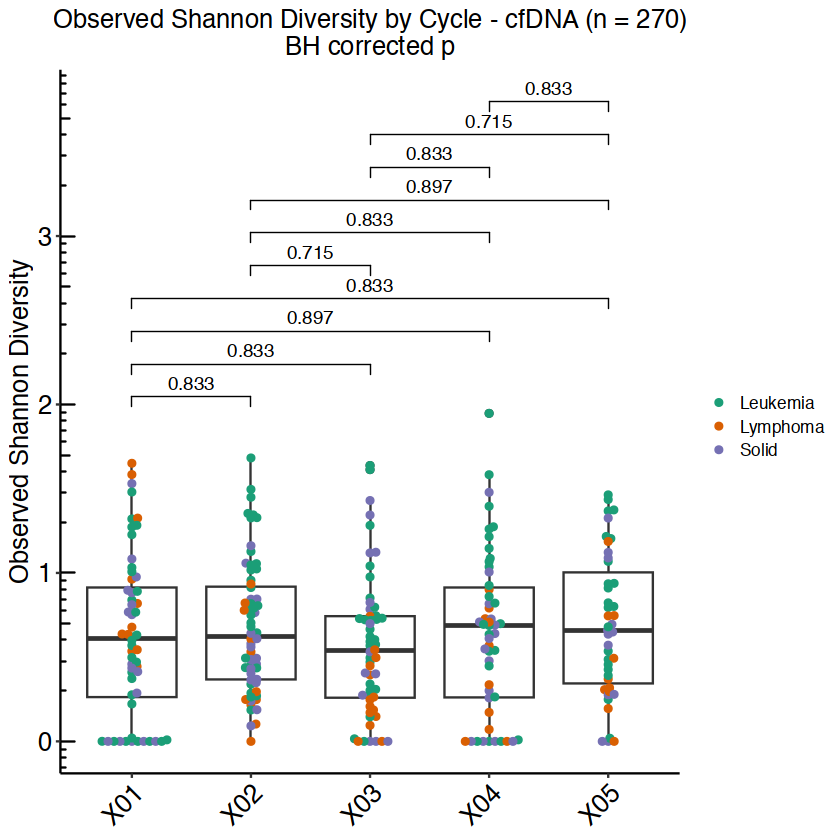

In [333]:
p_cfnda

In [402]:
mytab <- table(pbmc_noLFS$Patient, pbmc_noLFS$cycle) 

In [403]:
#select Patient with cycle 1 and 2
mytab <- mytab[mytab[,1] > 0 & mytab[,2] > 0,]

In [404]:
tmp <- pbmc_noLFS[which(pbmc_noLFS$Patient %in% rownames(mytab)),]
paired_pbmc <- tmp[ tmp$cycle %in% c("X01", "X02"),]

In [405]:
dim(paired_pbmc)

[1] 64 59

In [406]:
pairwise.t.test(paired_pbmc$log10shann, paired_pbmc$cycle, p.adjust.method = "none", pool.sd = F, paired = T)


	Pairwise comparisons using paired t tests 

data:  paired_pbmc$log10shann and paired_pbmc$cycle 

    X01  
X02 0.036

P value adjustment method: none 

In [407]:
table(paired_pbmc$Disease_type)


  ALCL    ALL    AML    BLL    CML   ERMS    EWS     HB     HD HR ALL     NB 
     2     12      6      2      4      2      6      4      4     10      2 
    OS  T-ALL 
     8      2 

In [408]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p_pbmc_paired <- ggplot(
  paired_pbmc,
  aes(x = cycle, y = log10shann)
) +
  geom_boxplot() + #  
  geom_point(aes(color = cancergroup), cex = 2) +
  geom_line(aes(group = Patient, color = cancergroup)) + 
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid")]) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  scale_y_continuous(breaks = log10(c(1,10,100,500,1000, 1500) ) , labels = c(1,10,100,500,1000, 1500)) +
  geom_pwc(
    mapping = aes(x = cycle, y = log10shann), data = paired_pbmc,
    p.adjust.method = "none", label = "{p.adj}",
    p.adjust.by = "group", method = "t_test", step.increase = 0.1) + # shows pool.sd = F
  labs(title = "Observed Shannon Diversity by Cycle - PBMC (n = 234)\nBH corrected p", y = "Observed Shannon Diversity") +
  # make facet
    facet_wrap(~cancergroup, nrow = 1)

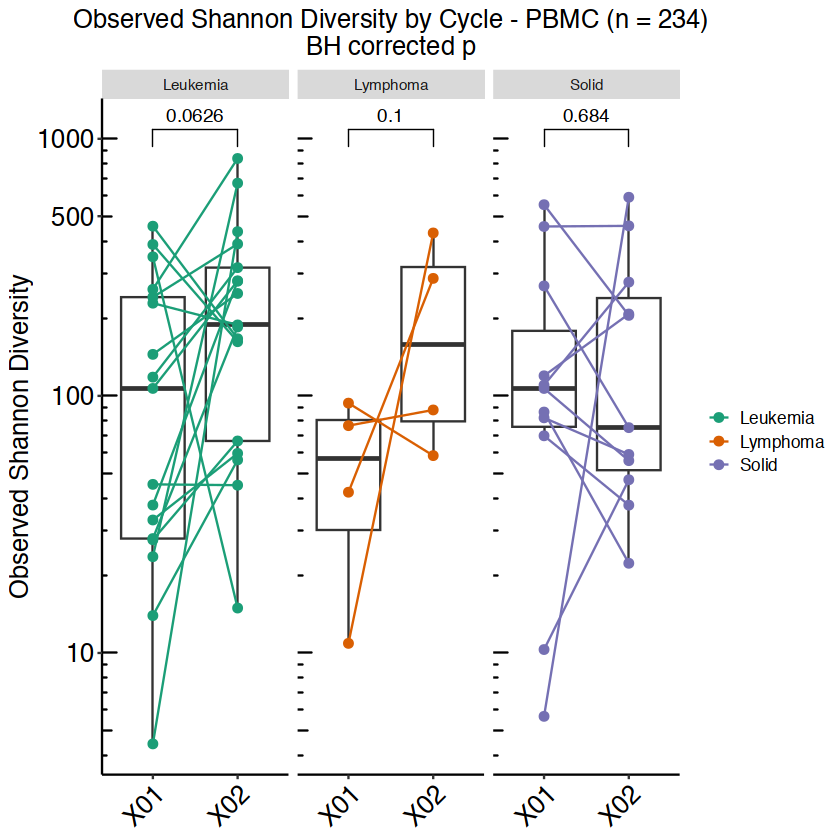

In [409]:
p_pbmc_paired